In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import describe,ttest_ind,f_oneway,pearsonr, spearmanr
from scipy import stats

In [62]:
house_sizes = np.array([50, 70, 80, 100, 120]) #x
house_prices = np.array([150.000, 200.000, 210.000, 250.000, 280.000]) #y
x= house_sizes
y=house_prices

In [63]:
#What is the slope and intercept of the regression line?
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("intercept: ", intercept)
print("slope: ", slope)

intercept:  64.3835616438356
slope:  1.8287671232876712


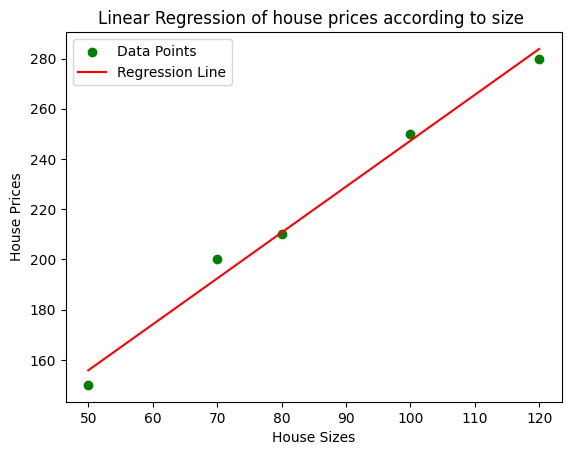

(1.8287671232876712, 64.3835616438356)

In [64]:

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
plt.scatter(x,y, color='green', label = 'Data Points')

x_reg = np.linspace(min(x), max(x), 100)  # Generating x values for the regression line
y_reg = slope * x_reg + intercept  # Calculating y values for the regression line
plt.plot(x_reg, y_reg, color='red', label='Regression Line')

plt.title('Linear Regression of house prices according to size ')
plt.xlabel('House Sizes')
plt.ylabel('House Prices')
plt.legend()
plt.show()

slope, intercept

In [65]:
#Predict the price of a house that is 90 square meters
prediction = slope * 90 + intercept
print("A house size of 90sqm would cost", prediction)

A house size of 90sqm would cost 228.97260273972603


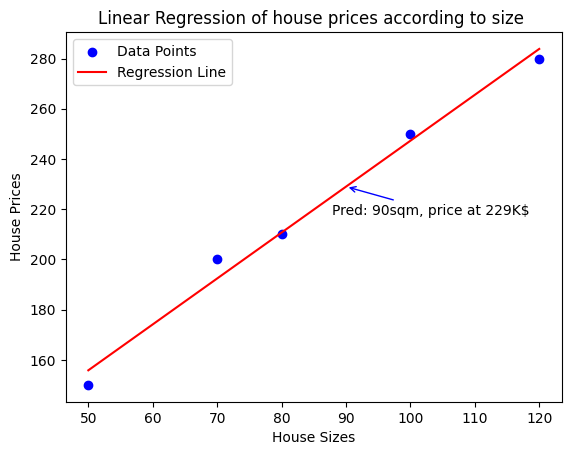

(1.8287671232876712, 64.3835616438356)

In [66]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
plt.scatter(x,y, color='blue', label = 'Data Points')

x_reg = np.linspace(min(x), max(x), 100)  # Generating x values for the regression line
y_reg = slope * x_reg + intercept  # Calculating y values for the regression line
plt.plot(x_reg, y_reg, color='red', label='Regression Line')

x = 90
y = 228.97260273972603
plt.annotate(f'Pred: {x}sqm, price at {round(y)}K$', xy=(x,y), xytext=(-10, -20),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'))
plt.title('Linear Regression of house prices according to size ')
plt.xlabel('House Sizes')
plt.ylabel('House Prices')
plt.legend()
plt.show()

slope, intercept

Interpret the meaning of the slope in the context of housing prices.

The slope explains how steap the regression line is, meaning in this context, how much more expensive does the housing get as the size of the increases.

2. ANOVA

In [34]:
fertilizer_1 = np.array([5, 6, 7, 6, 5])
fertilizer_2 = np.array([7, 8, 7, 9, 8])
fertilizer_3 = np.array([4, 5, 4, 3, 4])



In [36]:
#Perform an ANOVA test on the given data. What are the F-value and P-value?
f_statistic, p_value = f_oneway(fertilizer_1,fertilizer_2,fertilizer_3)
alpha = 0.05
print("F-value", f_statistic)
print("P-value: ", p_value)

F-value 28.52631578947368
P-value:  2.7542672098048448e-05


In [40]:
#which of the groups made the difference?

results = stats.tukey_hsd(fertilizer_1,fertilizer_2,fertilizer_3)
print(results)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -2.000     0.005    -3.343    -0.657
 (0 - 2)      1.800     0.010     0.457     3.143
 (1 - 0)      2.000     0.005     0.657     3.343
 (1 - 2)      3.800     0.000     2.457     5.143
 (2 - 0)     -1.800     0.010    -3.143    -0.457
 (2 - 1)     -3.800     0.000    -5.143    -2.457



The f value explains how far apart the groups are from one another. the p value is the probability that what you are testing for will or will not occuere by chance. a small p value whill show that it is very unlikely that the result of the test is due to chance.

In this anova test, we are testing for whether or not one of the plant fertilizers has a significant impact on the growth of the plants.

Results suggests that there is significant evidence to reject the null hypothesis, indicating that at least one of the fertilizers has a different effect compared to the others as the p value is super small and close to zero: 0.0000275427.

The turkey test shows that the strongest difference lies between groups 2 and 1


3.

In [4]:
#Calculating the probability of getting exactly 5 heads in 10 coin flips.
n, p = 10, 0.5  # number of trials, probability of each trial, p between 0-1
binomial = np.random.binomial(n, p, 1000)

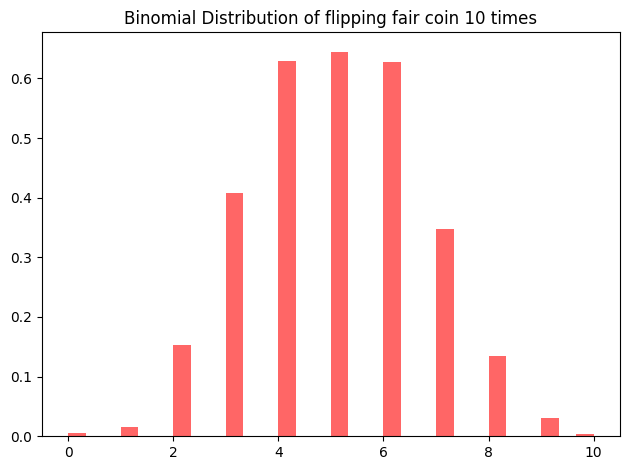

In [8]:
# Binomial
plt.hist(binomial, bins=30, density=True, alpha=0.6, color='r')
plt.title('Binomial Distribution of flipping fair coin 10 times')

plt.tight_layout()
plt.show()

We simulated 1000 rounds of flipping the coin 10 times and had a 50% chance of getting heads every time we flip. Each array represents the number of heads fliped in that round.Each bar represents the number of times we fliped a head through out the 1000 times. We can see that most of the times we flip 5 heads. Only very few times to we flip no heads of 10 heads.

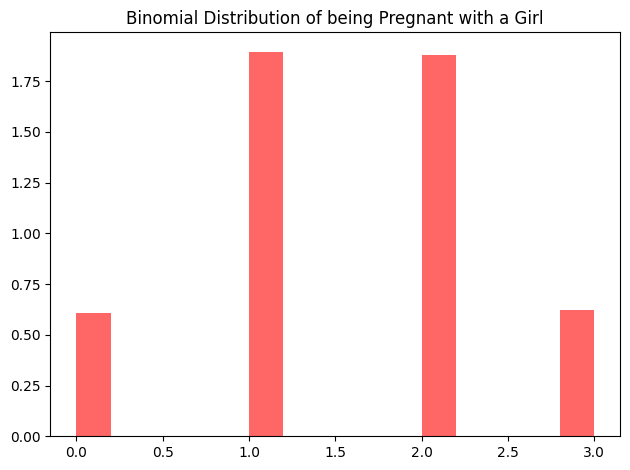

In [14]:
#probability of of being pregnant with a female when you will have 3 children.
n, p = 3, 0.5
binomial = np.random.binomial(n, p, 1000)

# Binomial
plt.hist(binomial, bins=15, density=True, alpha=0.6, color='r')
plt.title('Binomial Distribution of being Pregnant with a Girl')

plt.tight_layout()
plt.show()

4.

In [16]:
#Calculate the Pearson and Spearman correlation coefficients between two variables in a dataset.

data = pd.DataFrame({'age': [23, 25, 30, 35, 40],
                     'income': [35000, 40000, 50000, 60000, 70000]})

# Calculate Pearson Correlation between age and income
corr, _ = pearsonr(data['age'], data['income'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

Pearson Correlation Coefficient: 1.00


In [30]:
data = pd.DataFrame({'temperature': [8, 15, 30, 35, 38],
                     '# ppl at beach': [2, 10, 100, 120, 200]})
corr, _ = pearsonr(data['temperature'], data['# ppl at beach'])
print(f'Pearson Correlation Coefficient between temperatures and numbe of people at the beach: {corr:.2f}')

Pearson Correlation Coefficient between temperatures and numbe of people at the beach: 0.95


The pearson measures how stong the relationship is between variables. Used when wanting to assess if there is a linear relationshop between the featurs. Does the exam grade increase as the study time increase? According to this data, yes and the correlation is very strong making it worth it to study many hours. The correlation is measured between -1 and 1, where 0 shows no relationship and -1 suggests a strong negative linear relationship. In pearsons, the change in one variable is dependant on the change of another. :

In [21]:
data = pd.DataFrame({'study_time': [20, 24, 31, 35, 50],
                     'exam_grades': [55, 56, 60, 77, 85]})
corr, _ = spearmanr(data['study_time'], data['exam_grades'])
print(f'Spearman Rank Correlation: {corr:.2f}')

Spearman Rank Correlation: 1.00


In [29]:
pd.DataFrame({'temperature': [8, 15, 30, 35, 40],
                     '# ppl at beach': [2, 10, 100, 120, 5]})
corr, _ = spearmanr(data['temperature'], data['# ppl at beach'])
print(f'Spearman Rank Correlation: {corr:.5f}')

Spearman Rank Correlation: 1.00000


Spearman correlation measures if the two variables in question change together in the same direction but not necessarly at a consistant rate like a linear relationship. Useful for ordinal data, non-numeric data and it is robust to outliers!

Pearson correlation would conclude that when increasing a certain number of hours of study time, the grades could theoretically be accuratly predictable. While with Spearman, we can see that there is a positive correlation but the conclusion is more realistic as the grade points dont go up an even number of points as the hours of studying go up. This is the difference between a monotonic relationship and a linear relationship.

5.

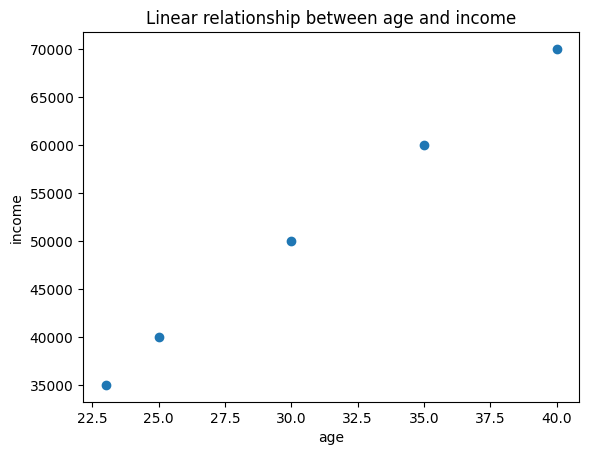

In [33]:
#Create a scatter plot of two variables (age and income) and visually assess the linear relationship
data = pd.DataFrame({'age': [23, 25, 30, 35, 40],
                     'income': [35000, 40000, 50000, 60000, 70000]})
plt.scatter(data.age,data.income)
plt.xlabel('age')
plt.ylabel('income')
plt.title("Linear relationship between age and income")
plt.show()